# TSP with GA

## 데이터 로딩 및 읽기

In [1]:
def read_file(file_name):
    text_file = open(file_name, 'r')
    data = [[int(n) for n in line.split()] for line in text_file]
    return data

In [2]:
data_5 = read_file('/Users/sangryupark/Documents/취업/포트폴리오/TSP-with-Genetic-Algorithm/dataset/five_d.txt')
data_17 = read_file('/Users/sangryupark/Documents/취업/포트폴리오/TSP-with-Genetic-Algorithm/dataset/gr17_d.txt')
data_26 = read_file('/Users/sangryupark/Documents/취업/포트폴리오/TSP-with-Genetic-Algorithm/dataset/fri26_d.txt')
data_42 = read_file('/Users/sangryupark/Documents/취업/포트폴리오/TSP-with-Genetic-Algorithm/dataset/dantzig42_d.txt')
data_48 = read_file('/Users/sangryupark/Documents/취업/포트폴리오/TSP-with-Genetic-Algorithm/dataset/att48_d.txt')

## Genetic Algorithm

In [3]:
import random

In [4]:
## Create genes for population
def create_gene(graph, start):
    gene = [start]
    while len(gene) != len(graph):
        candidate = random.randint(1, len(graph))
        if candidate not in gene:
            gene.append(candidate)
    gene.append(start)
    return gene

In [5]:
## Test create_gene
a = [[0,3,4,2,7], [3,0,4,6,3], [4,4,0,5,8], [2,6,5,0,6], [7,3,8,6,0]]
print(create_gene(a, 1))

[1, 4, 3, 5, 2, 1]


In [6]:
## Calculate cost for path
def calculate_cost(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i] - 1][path[i + 1] - 1]
    return cost

In [7]:
## Test for calculate_cost / Expected return : 80
a = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]
test_path = [1,2,4,3,1]
print(calculate_cost(a, test_path))

80


In [8]:
## Select save_rate amount of population and add new population
def sort_route_select(graph, start, population, save_rate):
    # sort the population
    for i in range(len(population) - 1):
        temp_cost = calculate_cost(graph, population[i])
        for j in range(i + 1, len(population)):
            if temp_cost > calculate_cost(graph, population[j]):
                temp = population[i]
                population[i] = population[j]
                population[j] = temp
    
    #Create new population from sorted : Top Ranked population + new population from random
    save_pop = int(len(population) * save_rate)
    new_pop = len(population) - save_pop
    new_population = population[:save_pop]
    
    for l in range(new_pop):
        random_select = random.randint(0, len(population) -1)
        new_population.append(population[random_select])
        
    return new_population

In [9]:
## Test for sort_route_select
population = []
for i in range(10):
    population.append(create_gene(data_17, 1))
result = sort_route_select(data_17, 1, population, 0.2)
for j in range(len(result)):
    print(calculate_cost(data_17, result[j]))

4115
4228
4228
4855
5027
4115
4877
4115
4855
4485


In [10]:
## Breed from population
def breed(parent1, parent2, start):
    child = []
    ch1 = parent1[1 : len(parent1) - 1]
    ch2 = parent2[1 : len(parent2) - 1]
    p1 = []
    p2 = []
    
    a_point = random.randint(0, len(ch1) - 1)
    b_point = random.randint(0, len(ch1) - 1)
    
    while a_point == b_point:
        b_point = random.randint(0, len(ch1) - 1)
    
    start = min(a_point, b_point)
    end = max(a_point, b_point)
    
    for i in range(start,end):
        p1.append(ch1[i])
    
    p2 = [item for item in ch2 if item not in p1]
    child = p1 + p2
    child.insert(0, 1)
    child.append(1)
    return child

In [11]:
## test for breed
p1 = [1,3,2,4,5,1]
p2 = [1,2,3,4,5,1]
print(breed(p1, p2, 1))

[1, 2, 4, 3, 5, 1]


In [12]:
## breed for population
def breed_population(population, save_rate, start):
    breed_result = []
    pool = random.sample(population, len(population))
    save = int(len(population) * save_rate)
    new = len(population) - save
    
    for i in range(save):
        breed_result.append(population[i])
    
    for j in range(new):
        child = breed(pool[j], pool[len(population) - j - 1], start)
        breed_result.append(child)
        
    return breed_result

In [13]:
## test for breed_population
population = []
for i in range (10):
    population.append(create_gene(data_17, 1))
print(population)
print(breed_population(population, 0.2, 1))

[[1, 12, 11, 17, 13, 5, 6, 8, 15, 3, 14, 4, 2, 9, 7, 10, 16, 1], [1, 4, 17, 10, 16, 14, 7, 8, 6, 9, 2, 12, 3, 13, 11, 15, 5, 1], [1, 15, 12, 8, 13, 5, 17, 2, 6, 16, 14, 3, 7, 9, 4, 11, 10, 1], [1, 13, 9, 4, 17, 6, 5, 12, 3, 15, 16, 14, 2, 7, 10, 8, 11, 1], [1, 7, 12, 11, 5, 2, 16, 3, 10, 9, 8, 14, 4, 13, 6, 17, 15, 1], [1, 11, 2, 16, 14, 12, 13, 10, 8, 7, 17, 3, 15, 5, 9, 4, 6, 1], [1, 13, 2, 14, 17, 10, 7, 16, 3, 8, 5, 9, 11, 12, 6, 4, 15, 1], [1, 7, 5, 15, 10, 13, 2, 11, 8, 14, 6, 3, 16, 17, 12, 4, 9, 1], [1, 16, 10, 17, 5, 2, 14, 8, 3, 13, 11, 7, 9, 12, 4, 6, 15, 1], [1, 4, 14, 10, 13, 11, 12, 5, 2, 7, 17, 3, 6, 8, 16, 15, 9, 1]]
[[1, 12, 11, 17, 13, 5, 6, 8, 15, 3, 14, 4, 2, 9, 7, 10, 16, 1], [1, 4, 17, 10, 16, 14, 7, 8, 6, 9, 2, 12, 3, 13, 11, 15, 5, 1], [1, 16, 3, 8, 5, 9, 4, 17, 10, 14, 7, 6, 2, 12, 13, 11, 15, 1], [1, 12, 4, 13, 9, 17, 6, 5, 3, 15, 16, 14, 2, 7, 10, 8, 11, 1], [1, 2, 11, 8, 14, 6, 3, 16, 7, 12, 5, 10, 9, 4, 13, 17, 15, 1], [1, 3, 15, 5, 9, 12, 8, 13, 17, 2, 6, 

In [14]:
## random mutation
def random_mutation(path):
    r = random.randint(1, len(path) - 2)
    r1 = random.randint(1, len(path) - 2)
    
    while r == r1:
        r1 = random.randint(1, len(path) - 2)
    temp = path[r]
    path[r] = path[r1]
    path[r1] = temp
    
    return path

In [15]:
## test for random_mutation
path = [1,2,3,4,1]
print(random_mutation(path))

[1, 4, 3, 2, 1]


In [16]:
## combine all methods to create next generation
def next_generation(graph, population, start, save_rate, save_possible):
    rank_population = sort_route_select(graph, start, population, save_rate)
    children = breed_population(population, save_rate, start)
    next_population = []
    for i in range(len(children)):
        possible = random.randint(0, 100)
        if possible < save_possible:
            mutated = random_mutation(children[i])
            next_population.append(mutated)
        else:
            next_population.append(children[i])
    return next_population

In [17]:
## test for next_generation
population = []
for i in range(3):
    population.append(create_gene(data_17, 1))
print(population)
print(next_generation(data_17, population, 1, 0.2, 5))

[[1, 16, 2, 8, 10, 17, 13, 11, 7, 6, 12, 4, 5, 14, 15, 3, 9, 1], [1, 14, 8, 12, 17, 6, 9, 11, 2, 4, 15, 16, 5, 13, 3, 10, 7, 1], [1, 4, 13, 6, 2, 12, 10, 3, 8, 9, 16, 15, 7, 17, 14, 5, 11, 1]]
[[1, 4, 13, 6, 2, 12, 10, 16, 8, 17, 11, 7, 5, 14, 15, 3, 9, 1], [1, 16, 5, 13, 14, 8, 12, 17, 6, 9, 11, 2, 4, 15, 3, 10, 7, 1], [1, 7, 6, 4, 13, 2, 12, 10, 3, 8, 9, 16, 15, 17, 14, 5, 11, 1]]


In [18]:
def tsp_genetic(graph, start, pop_size, run_time, save_rate, save_possible):
    population = []
    count = 0
    
    for i in range(pop_size):
        population.append(create_gene(graph, start))
    
    #print("Initial Population cost : ", calculate_cost(graph, population[0]))
        
    while count < run_time:
        new_population = next_generation(graph, population, start, save_rate, save_possible)
        population = new_population
        count += 1
        
    cost_index = 0
    min_cost = int(1e9)
    
    for k in range(len(population)):
        cost = calculate_cost(graph, population[k])
        if cost < min_cost:
            cost_index = k
            min_cost = cost
    
    #print(population[cost_index])
    return min_cost

In [19]:
## test for tsp_genetic
print(tsp_genetic(data_17, 1, 100, 2000, 0.2, 1))

2103


## Plot per generation

In [20]:
import matplotlib.pyplot as plt

In [21]:
def sort(graph, population):
    # sort the population
    for i in range(len(population) - 1):
        temp_cost = calculate_cost(graph, population[i])
        for j in range(i + 1, len(population)):
            if temp_cost > calculate_cost(graph, population[j]):
                temp = population[i]
                population[i] = population[j]
                population[j] = temp

In [22]:
def plot_tsp_result(graph, start, pop_size, run_time, save_rate, save_possible):
    population = []
    plot_data1 = []
    plot_data2 = []
    plot_data3 = []
    for i in range(pop_size):
        population.append(create_gene(graph, start))
    sort(graph, population)
    plot_data1.append(calculate_cost(graph, population[0]))
    
    for j in range(run_time):
        population = next_generation(graph, population, start, save_rate, save_possible)
        sort(graph, population)
        plot_data1.append(calculate_cost(graph, population[0]))
    
    
    population2 = []
    for m in range(pop_size):
        population2.append(create_gene(graph, start))
    
    sort(graph, population2)
    plot_data2.append(calculate_cost(graph, population2[0]))
    
    for k in range(run_time):
        population2 = next_generation(graph, population2, start, save_rate, save_possible)
        sort(graph, population2)
        plot_data2.append(calculate_cost(graph, population2[0]))
    
    
    population3 = []
    for n in range(pop_size):
        population3.append(create_gene(graph, start))
    
    sort(graph, population3)
    plot_data3.append(calculate_cost(graph, population3[0]))
    
    for l in range(run_time):
        population3 = next_generation(graph, population3, start, save_rate, save_possible)
        sort(graph, population3)
        plot_data3.append(calculate_cost(graph, population3[0]))
        
    plt.plot(plot_data1)
    plt.plot(plot_data2)
    plt.plot(plot_data3)
    plt.xlabel('Generation')
    plt.ylabel('Cost')
    plt.show()

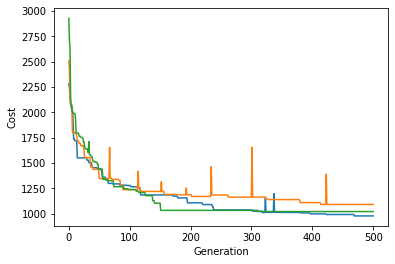

In [23]:
plot_tsp_result(data_26, 1, 100, 500, 0.2, 1)

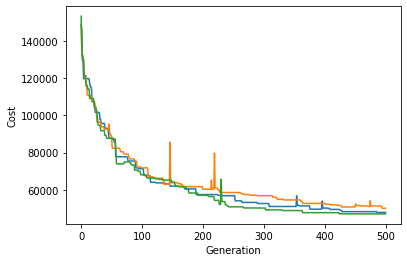

In [24]:
plot_tsp_result(data_48, 1, 100, 500, 0.2, 1)

# Average GA minimum cost

In [25]:
import time, math

In [26]:
def average(graph):
    result = 0
    result_list =[]
    start = time.time()
    for i in range(10):
        temp_result = tsp_genetic(graph, 1, 100, 500, 0.2, 1)
        result += temp_result
        result_list.append(temp_result)
    print("time : ", time.time() - start)
    print(result / 10)   
    return result_list


In [27]:
result_48 = average(data_48)

time :  193.13163495063782
52182.1


In [28]:
result_42 = average(data_42)

time :  168.11873936653137
1093.9


In [30]:
result_26 = average(data_26)

time :  110.50912690162659
1088.3


In [31]:
result_17 = average(data_17)

time :  79.67178988456726
2160.3


In [32]:
def accuracy(result, min_cost):
    accuracy_list = []
    for i in range(len(result)):
        error = math.fabs(result[i] - min_cost) / min_cost
        accurate = (1 - error) * 100
        accuracy_list.append(accurate)
    return accuracy_list

In [33]:
def average_accurate(accuracy) :
    total = 0
    for i in accuracy:
        total += i
    return total / 10

In [34]:
print(result_17)
accuracy_17 = accuracy(result_17, 2085)
print(accuracy_17)

[2158, 2142, 2170, 2177, 2129, 2149, 2317, 2103, 2142, 2116]
[96.49880095923261, 97.2661870503597, 95.92326139088729, 95.58752997601918, 97.88968824940048, 96.93045563549161, 88.87290167865707, 99.13669064748201, 97.2661870503597, 98.51318944844125]


In [35]:
print(average_accurate(accuracy_17))

96.3884892086331


In [48]:
accuracy_26 = accuracy(result_26, 937)
print(accuracy_26)

[82.17716115261473, 91.56883671291357, 77.16115261472785, 77.05442902881536, 83.03094983991463, 82.60405549626468, 82.71077908217717, 85.91248665955176, 85.80576307363927, 90.50160085378869]


In [49]:
print(average_accurate(accuracy_26))

83.85272145144077


In [50]:
accuracy_42 = accuracy(result_42, 699)
print(accuracy_42)

[47.63948497854077, 41.201716738197426, 45.779685264663804, 43.20457796852647, 38.91273247496424, 34.04864091559371, 44.206008583690995, 52.5035765379113, 51.50214592274678, 36.05150214592274]


In [51]:
print(average_accurate(accuracy_42))

43.50500715307582


In [53]:
accuracy_48 = accuracy(result_48, 47746)
print(accuracy_48)

[63.689104846479296, 83.56511540233737, 95.91379382566079, 96.83743140786663, 98.78104972144264, 91.04008712771751, 92.03702927993969, 92.75331964981359, 90.83692874795794, 95.31060193524064]


In [54]:
print(average_accurate(accuracy_48))

90.07644619444561


## 비교알고리즘 (Greedy Algorithm)

In [42]:
def find_min(graph, node, path):
    min_cost = int(1e9)
    return_node = node
    for i in range (len(graph[node - 1])):
        if graph[node - 1][i] != 0 and i + 1 not in path:
            if min_cost > graph[node - 1][i]:
                min_cost = graph[node - 1][i]
                return_node = i + 1
    return (return_node, min_cost)

In [43]:
def tsp_greedy(graph, start):
    path = [start]
    now = start
    cost = 0
    while(len(path) != len(graph)):
        future, future_cost = find_min(graph, now, path)
        cost += future_cost
        path.append(future)
        now = future
    cost += graph[now - 1][start - 1]
    path.append(start)
    print(path)
    return cost

### Test case for tsp_greedy

In [44]:
print(tsp_greedy(data_17, 1))

[1, 13, 4, 7, 8, 6, 17, 14, 15, 3, 11, 5, 10, 2, 9, 12, 16, 1]
2187


## Prepare compare approach (Greedy Algorithm)

In [45]:
def find_min(graph, node, path):
    min_cost = int(1e9)
    return_node = node
    for i in range (len(graph[node - 1])):
        if graph[node - 1][i] != 0 and i + 1 not in path:
            if min_cost > graph[node - 1][i]:
                min_cost = graph[node - 1][i]
                return_node = i + 1
    return (return_node, min_cost)

In [46]:
def tsp_greedy(graph, start):
    path = [start]
    now = start
    cost = 0
    while(len(path) != len(graph)):
        future, future_cost = find_min(graph, now, path)
        cost += future_cost
        path.append(future)
        now = future
    cost += graph[now - 1][start - 1]
    path.append(start)
    print(path)
    return cost

### Test case for tsp_greedy

In [47]:
print(tsp_greedy(data_17, 1))

[1, 13, 4, 7, 8, 6, 17, 14, 15, 3, 11, 5, 10, 2, 9, 12, 16, 1]
2187
